# Import Libraries and Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data=pd.read_csv('/content/test.csv')

In [4]:
data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
data.tail()

,Class Index,Title,Description
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...
7599,3,EBay gets into rentals,EBay plans to buy the apartment and home renta...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(7600, 3)

In [10]:
data.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [11]:
data['Summary']=data['Title']+' '+data['Description']

In [12]:
labels={1:'World News',2:'Sports News',3:'Business News',4:'Science&Tech News'}
data['Labels']=data['Class Index'].map(labels)

In [13]:
data['Labels'].value_counts()

,count
Labels,
Business News,1900
Science&Tech News,1900
Sports News,1900
World News,1900


The data is balanced

<Axes: xlabel='Labels', ylabel='count'>

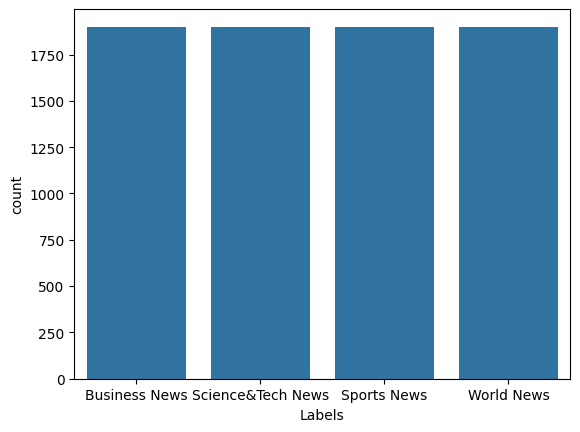

In [14]:
sns.countplot(data,x='Labels')

In [15]:
def remove_url(text):
    url_pattern=re.compile(r'https?://\S+|www\.\S+|\.\w+', flags=re.IGNORECASE)
    return url_pattern.sub(r'',text)

In [16]:
def striphtml(text):
  p=re.compile(r'<.*?>|\.')
  return p.sub('',text)

In [17]:
data['Summary']=data['Summary'].apply(remove_url)

In [18]:
data['Summary']=data['Summary'].apply(striphtml)

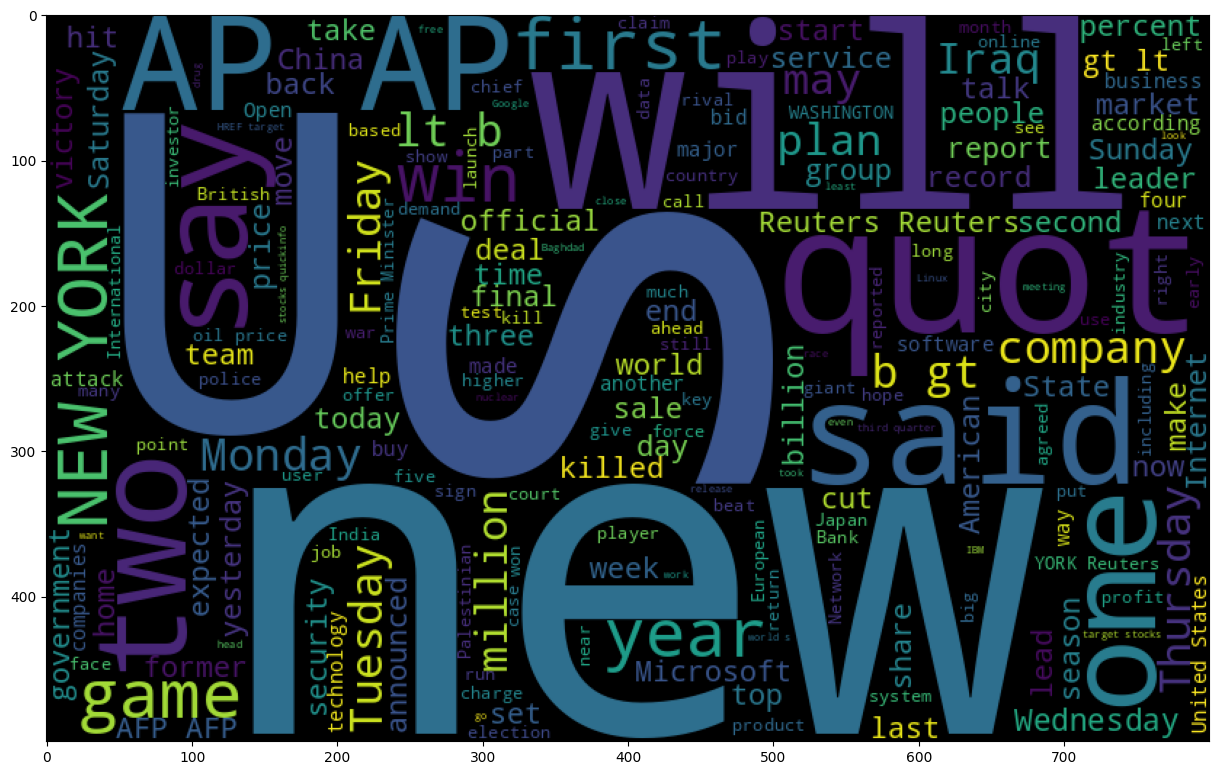

In [19]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,background_color='black').generate(''.join(data['Summary']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

In [20]:
data.head()

,Class Index,Title,Description,Summary,Labels
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Fears for T N pension after talks Unions repre...,Business News
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",The Race is On: Second Private Team Sets Launc...,Science&Tech News
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Ky Company Wins Grant to Study Peptides (AP) A...,Science&Tech News
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Prediction Unit Helps Forecast Wildfires (AP) ...,Science&Tech News
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Calif Aims to Limit Farm-Related Smog (AP) AP ...,Science&Tech News


In [21]:
data=data.drop(columns=['Title','Description'],axis=1)

In [22]:
data

,Class Index,Summary,Labels
0,3,Fears for T N pension after talks Unions repre...,Business News
1,4,The Race is On: Second Private Team Sets Launc...,Science&Tech News
2,4,Ky Company Wins Grant to Study Peptides (AP) A...,Science&Tech News
3,4,Prediction Unit Helps Forecast Wildfires (AP) ...,Science&Tech News
4,4,Calif Aims to Limit Farm-Related Smog (AP) AP ...,Science&Tech News
...,...,...,...
7595,1,Around the world Ukrainian presidential candid...,World News
7596,2,Void is filled with Clement With the supply of...,Sports News
7597,2,Martinez leaves bitter Like Roger Clemens did ...,Sports News
7598,3,5 of arthritis patients in Singapore take Bext...,Business News


In [23]:
data['Summary']=data['Summary'].apply(lambda x: [word.lower() for word in x])

In [24]:
import string
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

In [25]:
def remove_digits(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [26]:
data['Summary']=data['Summary'].apply(remove_punctuation)

In [27]:
data['Summary']=data['Summary'].apply(remove_digits)

In [28]:
data.head()

,Class Index,Summary,Labels
0,3,fears for t n pension after talks unions repre...,Business News
1,4,the race is on second private team sets launch...,Science&Tech News
2,4,ky company wins grant to study peptides ap ap ...,Science&Tech News
3,4,prediction unit helps forecast wildfires ap ap...,Science&Tech News
4,4,calif aims to limit farmrelated smog ap ap so...,Science&Tech News


In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def token_wordremoval(text):
    stop_words=set(stopwords.words('english'))
    word_tokens=word_tokenize(text)
    filtered_text=[word for word in word_tokens if word not in stop_words]
    return filtered_text

In [33]:
data['Summary']=data['Summary'].apply(token_wordremoval)

In [34]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [35]:
WNL = WordNetLemmatizer()
data['Summary'] = data['Summary'].apply(lambda tokens: [WNL.lemmatize(word) for word in tokens])

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
bow_matrix = CV.fit_transform([' '.join(tokens) for tokens in data['Summary']])

In [38]:
from sklearn.model_selection import train_test_split
X=bow_matrix
y=data['Labels']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [40]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [41]:
y_pred=model.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.8881578947368421

In [52]:
print(y_test.tolist()[:20])
print(y_pred.tolist()[:20])

['Sports News', 'World News', 'Science&Tech News', 'Science&Tech News', 'Science&Tech News', 'Business News', 'World News', 'Business News', 'Science&Tech News', 'Business News', 'Sports News', 'Business News', 'Business News', 'World News', 'Sports News', 'Sports News', 'Business News', 'Sports News', 'Business News', 'Sports News']
['Sports News', 'Science&Tech News', 'Business News', 'Science&Tech News', 'Science&Tech News', 'Business News', 'World News', 'Business News', 'Science&Tech News', 'World News', 'Sports News', 'Business News', 'Business News', 'World News', 'Sports News', 'Sports News', 'Business News', 'Sports News', 'Business News', 'Sports News']


<Axes: >

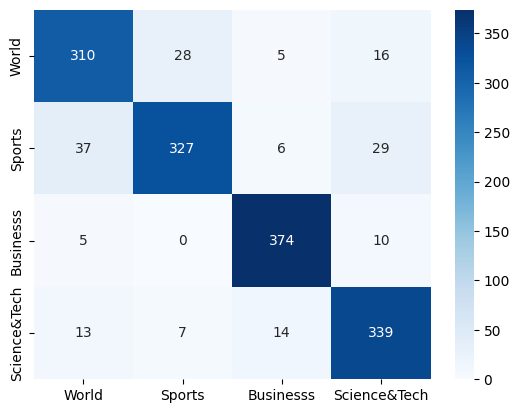

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_df=pd.DataFrame(cm,index=['World','Sports','Businesss','Science&Tech'],columns=['World','Sports','Businesss','Science&Tech'])
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',xticklabels=['World','Sports','Businesss','Science&Tech'],yticklabels=['World','Sports','Businesss','Science&Tech'])

In [43]:
from sklearn.svm import SVC
s = SVC()

In [44]:
s.fit(X_train,y_train)

SVC()

In [45]:
svm_ypred=s.predict(X_test)

In [48]:
accuracy_score(y_test,svm_ypred)

0.8881578947368421

In [ ]:
filename=''

Accuracy: 0.8032894736842106
                   precision    recall  f1-score   support

    Business News       0.67      0.81      0.73       359
Science&Tech News       0.82      0.74      0.77       399
      Sports News       0.90      0.83      0.86       389
       World News       0.87      0.83      0.85       373

         accuracy                           0.80      1520
        macro avg       0.81      0.80      0.80      1520
     weighted avg       0.81      0.80      0.81      1520



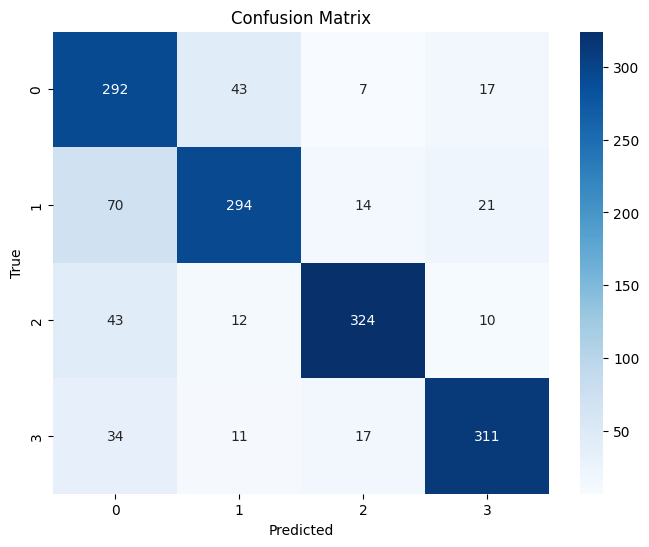

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'X_train', 'X_test', 'y_train', 'y_test' from previous steps

# Create and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# Adjust n_estimators (number of trees) and learning_rate as needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [57]:
import joblib
joblib.dump(s,'news_classifier.pkl')
print("Model Saved")

Model Saved
